<a href="https://colab.research.google.com/github/fernandotoscano/BIOINFORMATICS/blob/main/python/CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



# ***PART_5: MODEL COMPARISON***

**IN THIS CHAPTER WILL GONNA SHOW HOW TO COMPARE SEVERAL MACHINE LEARNING ALGORITHMS FOR BUILDING REGRESSION MODELS FOR ACETYLCHOLINESTERASE INHIBITORS AND TODAY, WE'RE GOING TO BE USING A LAZY (RÁPIDA/SIMPLES/EFICAZ) AND EFFICIENT WAY OF BUILDING SEVERAL MACHINE LEARNING ALGORITHMS AND THIS WAS SHOWN IN A RECENT VIDEO USING THE LAZY PREDICT PYTHON LIBRARY AND SO WE'RE GOING TO BE USING THAT FOR TODAY'S TUTORIAL AND BEFORE PROCEEDING MFURTHER   LET'S DO A QUICK RECAP:

_SO IN **PART_1** WE'VE SHOWN HOW WE CAN COLLECT ORIGINAL DATA SET IN BIOLOGY THAT WE COULD USE IN OUR OWN DATA SCIENCE PROJECT PARTICULALRLY WE HAVE DEMONSTRATED TO HOW WE COULD DOWNLOAD AND PRE-PROCESS THE BIOLOGICAL ACTIVITY DATA FROM THE CHEMBL DATABASE AND THE DATA SET IS COMPRISED OF [1:11:47] OF COMPOUNDS AND MOLECULES THAT HAVE BEEN BIOLOGICALLY TESTED FOR THEIR ACTIVITY TOWARD THE TARGET ORGANISM OR PROTEIN OF INTEREST.
_THEN IN **PART_2** WE HAVE SHOWN HOW WE COULD CALCULATE THE LIPINSKI DESCRIPTORS, WHICH ARE DESCRIPTORS USED FOR EVALUATING THE LIKELIHOOD  OF BEING A DRUG-LIKE MOLECULE AND THEN WE'VE SHOWN HOW WE COULD PERFORM SIME BASIC EXPLORATORY DATA ANALYSIS ON "THESE(SEE IN PART_2)" LIPINSKI DESCRIPTORS PARTICULARLY THE EDA ARE BASED ON MAKING SIMPLE BOX PLOT AND SCATTER PLOT IN ORDER TO VISUALIZE THE DIFFERENCES OF THE ACTIVE AND INACTIVE SUBSET OF THE COMPOUND.
_IN **PART_3** WE HAVE MADE SOME CHANGES TO TARGET PROTEIN AND THEN WE'RE USING THE ACETYLCHOLINESTERASE AS IT PROVIDES A LARGER SET TO WORK WITH. AND SO IN THIS PART_3 WE HAVE ALREADY COMPUTED THE MOLECULAR DESCRIPTORS USING THE "PADEL" DESCRIPTOR SOFTWARE AND THEN WE PREPARED THE DATA SET COMPRISING OFTHE "X" AND "Y" DATA FRAMES AND THEN WE USED THAT TO BUILD A PREDICTION MODEL IN THE SUBSEQUENT PARTS WHICH IS PART_4.
_IN **PART_4** WE USED THE DESCRIPTORS GENERATED FROM PART_3 IN ORDER TO BUILD A REGRESSION MODEL USONG THE RANDOM FOREST ALGORITHM.

_AND NOW TO **PART_5** LET'S GET STARTED:
SO HERE WE'RE GOING TO COMPARE SEVERAL MACHINE LEARNING ALGORITHM USING THE "lazypredict" LIBRARY.
AND SO THE 1ST THING THAT WE NEED TO DO IS AFTER DOWNLOADED THE FILE FROM DATA PROFESSOR/CODE/PYTHON "CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb" TO OUR COMPUTER, AND START THE NOTEBOOK, IS INSTALL THE LAZT PREDICT AND SO IN A PRIOR WE'VE SHOWN HOW WE COULD USE THE "LAZYPREDICT" TO DO A QUICK AND RAPID MODEL BUILDING OF CLASSIFICATION AND ALSO A REGRESSION MODEL IN JUST A FEW LINES OF CODE. AND SO LET'S START BY INSTALLING THE LIBRARY:**

## **1. Import libraries**

In [4]:
! pip install lazypredict

**THE NEXT INSTALLATION "! pip install dask[dataframe]", WAS SUGESTED BY THE SOFTEWARE OF COLAB**

In [5]:
! pip install dask[dataframe]

**AND NOW WE'RE GOING TO BE IMPORTING THE NECESSARY LABRARIES AND SO HERE WE'RE USING THE PANDAS, SEABORN AND ALSO THE SCIKIT LEARN LIBRARY, SPECIFICALLY WE'RE IMPORTING THE TRAIN TEST SPLIT FUNCTION AND THEN WE'RE GOING TO BE IMPORTING THE LAZYPREDICT AND ALSO THE LAZY REGRESSOR FUNCTION:**

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


**NOW WE'RE GOING TO BE LOADING UP THE DATA SET AND WE'RE GOING TO BE DIRECT DOWNLOADING IT FROM THE GITHUB "github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv", **

In [7]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-02-05 11:20:20--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-02-05 11:20:20--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

**NOW WE'RE GOING TO DOWNLOAD IT AND NOW WE'RE GOING TO BE READING IN THE FILE AND THEN WE'RE GOING TO ASSIGNING IT TO THE "df" DATA FRAME:**

In [8]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

**NOW WE'RE GOING TO SPLITTING IT UP INTO THE "X" AND "Y" VARIABLES:**

In [9]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

**NOW LET'S TAKE A LOOK AT THE DIMENSION OF THE "X" VARIABLE **

In [10]:
# Examine X dimension
X.shape

(4695, 881)

**ANALYSING THE ABOVE DIMENSION, WE CAN SEE THAT IT HAS A TOTAL OF 4695 ROWS OR THE NUMBER OF COMPOUNDS IN THE DATA SET AND IT HAS A TOTAL OF 881 DESCRIPTORS OR THE FEATURES OR THE NUMBER OF COLUMNS. AND SO THE 1ST THING THAT WE NEED TO DO, IS WE'RE GOING TO BE REMOVING THE LOW VARIANCE FEATURES,
SO THOSE THAT HAVE LOW VARIANCE.**

In [11]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

**AND LET'S TAKE A LOOK AT THE DIMENSION OF THE DATA SET AGAIN. AND SO WE HAVE A REDUCED SUBSET FROM 881 TO BE 137 VARIABLES.
NOW WE'RE GOING TO BE PERFORMING A DATA SPLIT USING THE 80:20 RATIO.**

In [12]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

**NOW, COMES THE FUN PART SO AS WE CAN SEE HERE WE'RE GOING TO BE BUILDING MORE THEN 20 MACHINE LEARNING MODELS [1:15:25].
AND SO WE'RE USING ONLY 3 LINES OF CODE THE 1ST ONE IS LIKE ANY OTHER SCIKIT-LEARN FUNCTIONS FOR BUILDING THE MODEL, IS TO ASSIGN THEMACHINE LEARNING ALGORITHM INTO A CLASSIFIER VARIABLE AND THEN WE'RE GOING TO BE ASSIGNING THE RESULTS FROM THE PREDICTION AFTER WE BUILT THE MOLDEL AND THEN WE'RE ASSIGNING IT TO THE TRAIN AND TEST VARIABLES. SO THE TRAIN AND TEST VARIABLES WILL BE CONTAINING THE PERFORMANCE IF THE MODEL'S PREDICTION. AND SO LET'S BUILD THE MODEL, RUNNING THE CODE BELLOW:**

In [13]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:00<00:00,  1.18it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [01:01<00:00,  1.46s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:51<00:00,  1.19it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:51<00:00,  1.24s/it]


**SO ABOVE WE'VE 42 MODELS, 42 MACHINE LEARNING ALGORITHMS, THIS TAKES SOME TIME BECAUSE THE DATA IS RELATIVELY BIG AT ALMOST 5000 ROWS.
AND SO, IT SHOULD BE NOTED HERE THAT MODEL BUILDING IS USING DEFAULT PARAMETERS FOR ALL OF THE 42 ALGORITHMS USED.
AND SO IF WE WANT TO PERFORM HYPER PARAMETER OPTIMIZATION THAT WILL BE A TOPIC FOR ANOTHER VIDEO (NOTE THAT THIS LINES OF CODE ABOVE ARE NOT EQUAL TO THE_ VIDEO LINES OF CODE, IT HAS BEEN IMPROVED SINCE THE VIDEO WAS RECORDED).

_AND SO MODELS HAVE BEEN BUILT AND LET'S HAVE A LOOK AT THE TRAIN:**

In [14]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.86,0.57,0.38
ExtraTreeRegressor,0.86,0.86,0.57,0.20
ExtraTreesRegressor,0.86,0.86,0.57,8.21
GaussianProcessRegressor,0.86,0.86,0.57,7.37
RandomForestRegressor,0.82,0.83,0.64,6.34
BaggingRegressor,0.80,0.81,0.67,1.01
MLPRegressor,0.76,0.77,0.75,8.20
HistGradientBoostingRegressor,0.67,0.69,0.87,1.01
LGBMRegressor,0.65,0.67,0.90,0.39


**SO "DecisionTreeRegressor" IS THE BEST MODEL HERE, SO FROM OUR PRIOR TUTORIALS, "RandomForestRegressor" (MUST BE CONFIRMED) WAS USED FOR THE MODEL BUILDING, AND SO HERE IT HAD "SLIGHTLY BETTER PERFORMANCE" (NOT CORRECT???).

_NOW LET'S LOOK AT THE TEST SET:**

In [15]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.57
RandomForestRegressor,0.44,0.52,1.08,4.94
LGBMRegressor,0.44,0.52,1.08,0.34
BaggingRegressor,0.41,0.49,1.11,0.53
NuSVR,0.39,0.48,1.12,1.52
SVR,0.39,0.48,1.12,2.86
KNeighborsRegressor,0.37,0.46,1.14,0.21
MLPRegressor,0.36,0.45,1.15,7.99
GradientBoostingRegressor,0.33,0.42,1.18,2.60


**IN TEST SET "HistGradientBoostingRegressor" IS THE 1ST MODEL, "RandomForestRegressor" ALSO AT 2ND PLACE HERE, BUT THE THING IS THEY'RE ROUGHLY THE SAME "0.54" AND "0.52" **

## **5. Data visualization of model performance**

**LET'S HAVE A LOOK AT THE DATA VISUALIZATION [1:17:26] OF THE MODEL PERFORMANCE.
SO THE BARA PLOT OF THE "R-SQUARED" VALUES IS PROVIDED HERE:**

[(0.0, 1.0)]

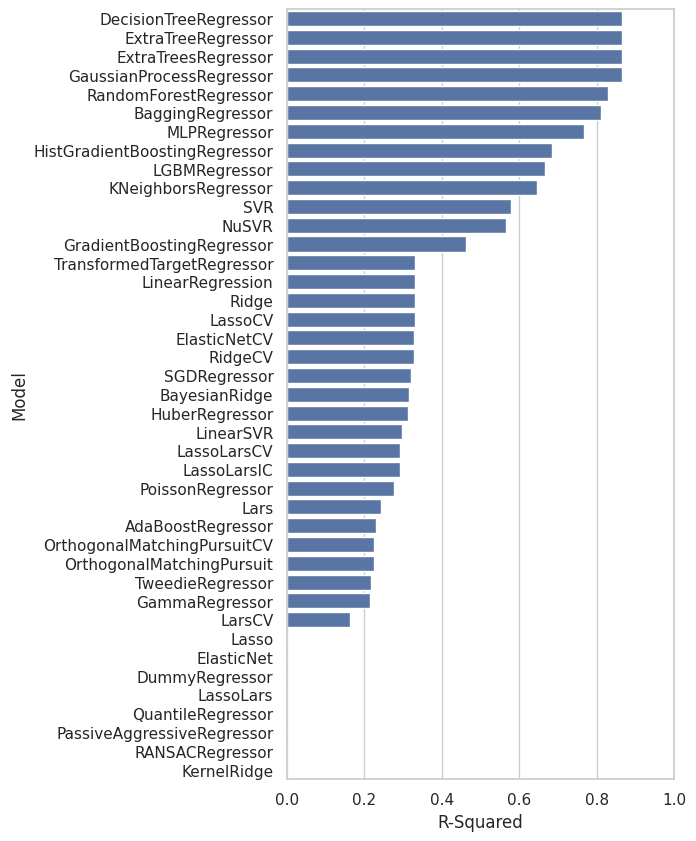

In [16]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

**AND NOW WE'RE GOING TO HAVE A LOOK AT THE "RMSE" VALUES HERE,**

[(0.0, 10.0)]

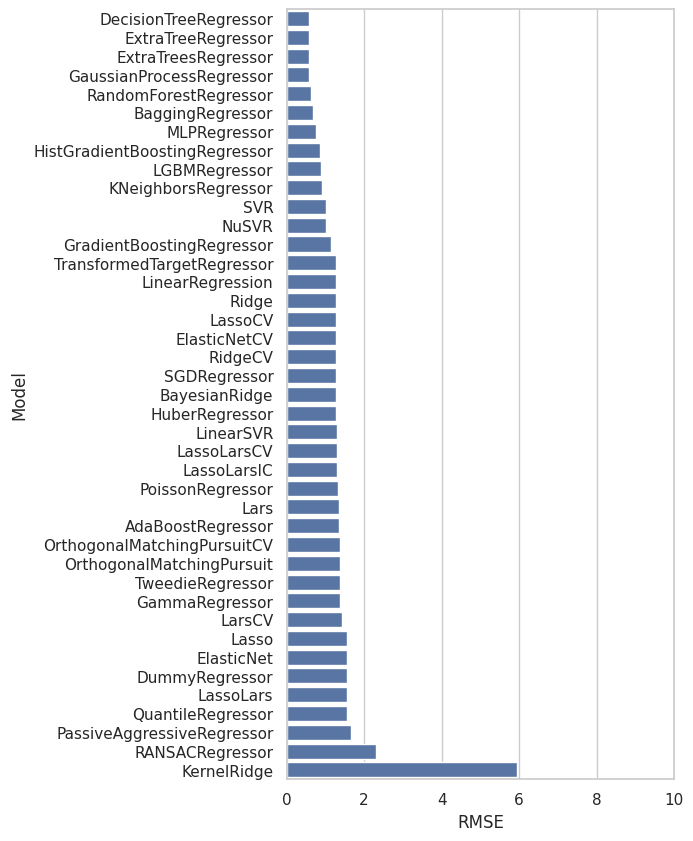

In [17]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

**AND HERE WE'RE ALSO GOING TO HAVE A LOOK AT THE "CALCULATION TIME",  **

****

[(0.0, 10.0)]

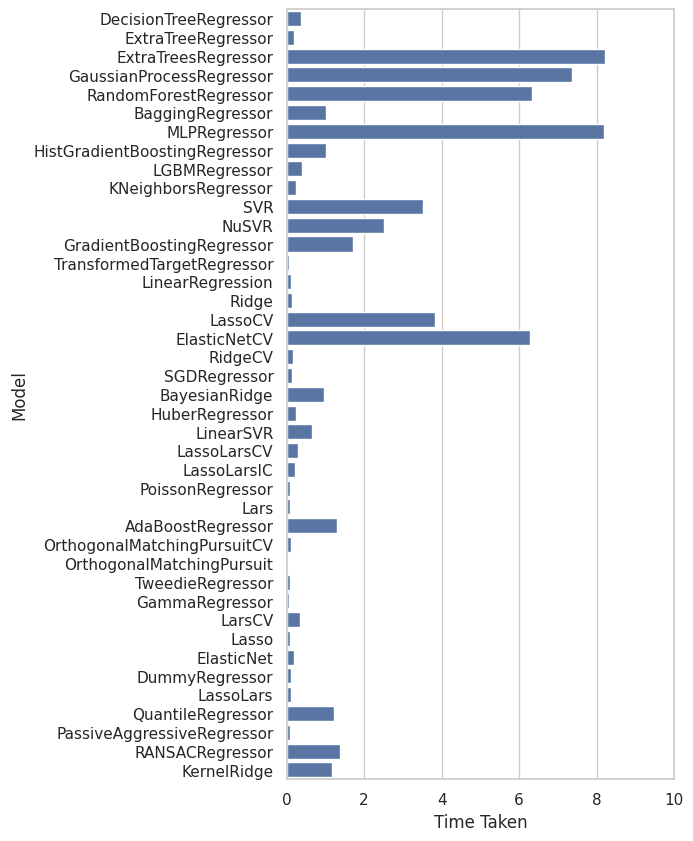

In [18]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

**SO THE LONGER THE BARS BECOME THE LONGER IT TAKES TO BUILD THE MODEL.**

**WITH THIS WE'VE ALREADY BUILT SEVERAL MACHINE LEARNING MODELS FOR COMPARISON**

# **END OF PART_5**

**IN PRIOR CHAPTERS OF BIOINFORMATICS FROM SCRATCH SERIES WE HAVE LEARNED HOW:
_TO COMPILE OUR VERY OWN BIOACTIVITY DATA SET DIRECTLY FROM THE "CHEMBL" DATABASE,
_HOW TO PERFORM EDA (EXPLORATORY DATA ANALYSIS)ON THE COMPUTED LIPINSKI DESCRIPTORS,
_WE'VE LEARNED HOW TO BUILD RANDOM FOREST MODEL,
_WE'VE LEARNED ALSO LEARNED HOW TO BUILD SEVERAL MACHINE LEARNING MODELS, COMPARING THE MODEL PERFORMANCE, USING THE LAZYP REDICT LIBRARY.**

# **PART_6**
**SO IN THE NEXT CHAPTER, **PART_6**, WE'LL BE TAKING A LOOK ATHOW WE CAN TAKE MACHINE LEARNING OF THE BIOACTIVITY DATA SET AND CONVERT IT INTO A WEB APPLICATION THAT WE COULD DEPLY ON THE CLOUD THAT WILL ALLOW USERS TO BE ABLE TO MAKE PREDICTIONS ON OUR MACHINE LEARNING MODEL, FOR THE TARGET PROTEIN OF OUR INTEREST.
AND SO WITHOUT FURTHER DO, WED'LL START RIGHT NOW.

SO THE 1ST THING WE'RE GONNA DO IS, GO TO THE BIOACTIVITY PREDICTION APP FOLDER (https://github.com/dataprofessor/bioactivity-prediction-app), AND SO THIS FOLDER WILL BE PROVIDED IN THE GITHUB LINK IN THE VIDEO DESCRIPTION AND SO BEFORE WE START LET US SHOW HOW THE APP LOOKS LIKE (SEE VIDEO [1:19:29]) **